In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    

%matplotlib inline

In [2]:
movie_budgets = 'tn.movie_budgets.csv.gz'

df_movie_budgets = pd.read_csv(f'zippedData/{movie_budgets}')
df_movie_budgets
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [3]:
def reformat_money(money):
    money = money.replace(',','')
    return int(money[1:])

df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].apply(reformat_money)
df_movie_budgets['domestic_gross'] = df_movie_budgets['domestic_gross'].apply(reformat_money)
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].apply(reformat_money)

df_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [4]:
# Create revenue and profit column
revenue = df_movie_budgets['domestic_gross'] + df_movie_budgets['worldwide_gross']
profit = revenue - df_movie_budgets['production_budget']

df_movie_budgets['revenue'] = revenue
df_movie_budgets['profit'] = profit

# df_movie_budgets['revenue'] = revenue
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


In [5]:
movie_release = df_movie_budgets.copy() #we're going to need a copy of this later
movie_release['month'] = movie_release['release_date'].str[:3] #change these into strings
movie_release['year'] = movie_release['release_date'].str[7:].astype(int)
movie_release = movie_release.drop_duplicates().dropna().loc[(movie_release!=0).all(1)] # goodbye Nans, zeros, and duplicates

movie_release

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,profit,month,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,Dec,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,May,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,Jun,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,May,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129,Dec,2017
...,...,...,...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,141715,134715,May,2006
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,1800,-5200,Dec,2004
5778,79,"Apr 2, 1999",Following,6000,48482,240495,288977,282977,Apr,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2676,-2324,Jul,2005


In [6]:
rearrange_columns = list(movie_release.columns)
rearrange_columns[0],rearrange_columns[8] = rearrange_columns[8],rearrange_columns[0]
rearrange_columns[2],rearrange_columns[9] = rearrange_columns[9],rearrange_columns[2]
rearrange_columns

['month',
 'release_date',
 'year',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'revenue',
 'profit',
 'id',
 'movie']

In [7]:
movie_release = movie_release[rearrange_columns]
movie_release

,month,release_date,year,production_budget,domestic_gross,worldwide_gross,revenue,profit,id,movie
0,Dec,"Dec 18, 2009",2009,425000000,760507625,2776345279,3536852904,3111852904,1,Avatar
1,May,"May 20, 2011",2011,410600000,241063875,1045663875,1286727750,876127750,2,Pirates of the Caribbean: On Stranger Tides
2,Jun,"Jun 7, 2019",2019,350000000,42762350,149762350,192524700,-157475300,3,Dark Phoenix
3,May,"May 1, 2015",2015,330600000,459005868,1403013963,1862019831,1531419831,4,Avengers: Age of Ultron
4,Dec,"Dec 15, 2017",2017,317000000,620181382,1316721747,1936903129,1619903129,5,Star Wars Ep. VIII: The Last Jedi
...,...,...,...,...,...,...,...,...,...,...
5775,May,"May 26, 2006",2006,7000,70071,71644,141715,134715,76,Cavite
5776,Dec,"Dec 31, 2004",2004,7000,900,900,1800,-5200,77,The Mongol King
5778,Apr,"Apr 2, 1999",1999,6000,48482,240495,288977,282977,79,Following
5779,Jul,"Jul 13, 2005",2005,5000,1338,1338,2676,-2324,80,Return to the Land of Wonders


In [8]:
movie_release_years = movie_release['year'].value_counts(ascending = False) # frequency
# movie_release_years = movie_release['year'].sort_values(ascending=False) # min year 1915 max year 2020
movie_release_years

2006    247
2010    246
2008    239
2011    227
2005    214
       ... 
1947      1
1934      1
1958      1
1935      1
1916      1
Name: year, Length: 92, dtype: int64

Text(0.5, 1.0, 'Frequency of Movies Released by Years')

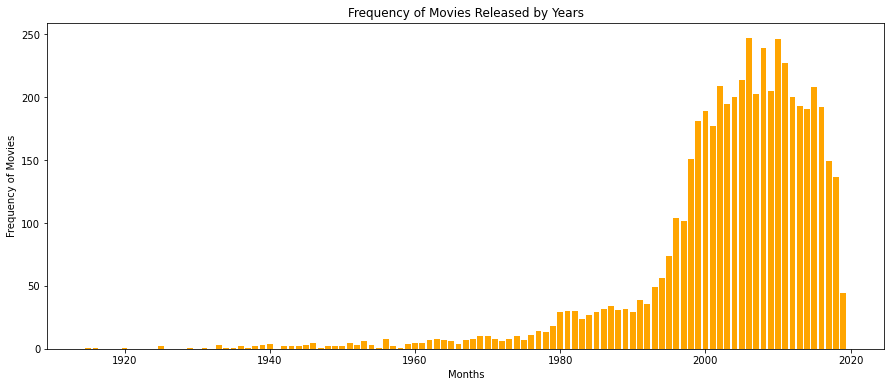

In [9]:
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(movie_release_years.index,movie_release_years, color='Orange')
ax.set_xlabel('Months');
ax.set_ylabel('Frequency of Movies')
ax.set_title('Frequency of Movies Released by Years')

Lets look at movies that were released from 2009 to 2019. Not many movies were released in 2020 because of COVID.

In [10]:
movie_release_10years = movie_release[movie_release['year'] >= 2009]
movie_release_10years

,month,release_date,year,production_budget,domestic_gross,worldwide_gross,revenue,profit,id,movie
0,Dec,"Dec 18, 2009",2009,425000000,760507625,2776345279,3536852904,3111852904,1,Avatar
1,May,"May 20, 2011",2011,410600000,241063875,1045663875,1286727750,876127750,2,Pirates of the Caribbean: On Stranger Tides
2,Jun,"Jun 7, 2019",2019,350000000,42762350,149762350,192524700,-157475300,3,Dark Phoenix
3,May,"May 1, 2015",2015,330600000,459005868,1403013963,1862019831,1531419831,4,Avengers: Age of Ultron
4,Dec,"Dec 15, 2017",2017,317000000,620181382,1316721747,1936903129,1619903129,5,Star Wars Ep. VIII: The Last Jedi
...,...,...,...,...,...,...,...,...,...,...
5737,Mar,"Mar 18, 2016",2016,30000,144822,144822,289644,259644,38,Krisha
5740,Oct,"Oct 15, 2010",2010,30000,9812,9812,19624,-10376,41,Down Terrace
5744,Jan,"Jan 27, 2017",2017,27000,3547,3547,7094,-19906,45,Emily
5760,Apr,"Apr 2, 2010",2010,15000,115592,115592,231184,216184,61,Breaking Upwards


In [11]:
# create a dataframe from month and profit
profit_by_month = movie_release_10years[['month','profit']]
profit_by_month = profit_by_month.sort_values('profit',ascending=False)

Text(0.5, 1.0, 'Profit from 2009-2019 by Month')

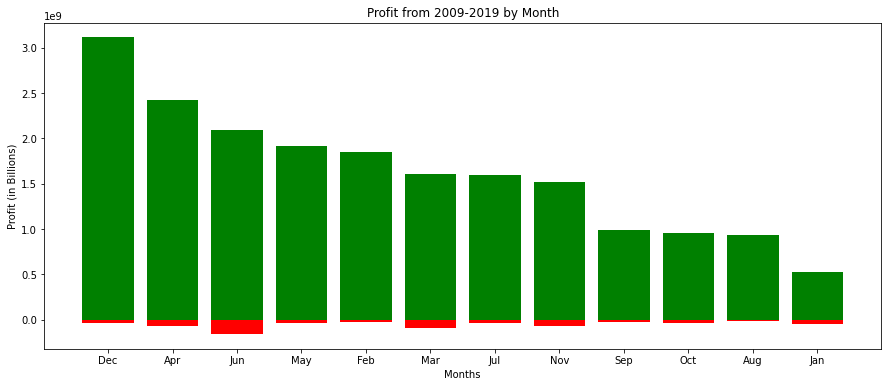

In [12]:
# plot it like its hotttt
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(profit_by_month['month'],
       profit_by_month['profit'], 
       color=(profit_by_month['profit']>0).map({True:'Green',False:'Red'})
      )
ax.set_xlabel('Months')
ax.set_ylabel('Profit (in Billions)')
ax.set_title('Profit from 2009-2019 by Month')

Overall the months that made the most profit from the years 2009-2019 is December, April, and June. Although June lost a significant amount.

In [13]:
# Moving on lets load IMDB
imbd_title = 'imdb.title.basics.csv.gz'

imbd_title_data = pd.read_csv(f'zippedData/{imbd_title}')
imbd_title_data

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [14]:
# check for no null-values
imbd_title_data.info()
imbd_title_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [15]:
imbd_title_data = imbd_title_data.drop(["original_title", "runtime_minutes", "tconst"], axis = 1) # drop the missing values
imbd_title_data.dropna(inplace=True)  # drop missing value genres
imbd_title_data = imbd_title_data.rename(columns={"primary_title": "movie"}) # rename column for later merge
imbd_title_data.isna().sum()
imbd_title_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   movie       140736 non-null  object
 1   start_year  140736 non-null  int64 
 2   genres      140736 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.3+ MB


In [16]:
# Hello new clean data
imbd_title_data

,movie,start_year,genres
0,Sunghursh,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,"Biography,Drama"
2,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,2018,"Comedy,Drama"
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
...,...,...,...
146138,The Secret of China,2019,"Adventure,History,War"
146139,Kuambil Lagi Hatiku,2019,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,Dankyavar Danka,2013,Comedy


In [17]:
# lets use the first genre listed in the string of genres to keep it consistent
def first_genre_listed(n):
    # Return only the first genre listed
    n = str(n)
    if n == '\\N':
        return ''
    return n.split(',')[0].strip()

imbd_title_data['genres'] = imbd_title_data['genres'].apply(first_genre_listed)

imbd_title_data

,movie,start_year,genres
0,Sunghursh,2013,Action
1,One Day Before the Rainy Season,2019,Biography
2,The Other Side of the Wind,2018,Drama
3,Sabse Bada Sukh,2018,Comedy
4,The Wandering Soap Opera,2017,Comedy
...,...,...,...
146138,The Secret of China,2019,Adventure
146139,Kuambil Lagi Hatiku,2019,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,Dankyavar Danka,2013,Comedy


In [18]:
#lets stick to 10 years we got something good going on
imbd_movie_budget = imbd_title_data.merge(movie_release_10years, on = "movie", how="inner")
imbd_movie_budget

,movie,start_year,genres,month,release_date,year,production_budget,domestic_gross,worldwide_gross,revenue,profit,id
0,On the Road,2012,Adventure,Mar,"Mar 22, 2013",2013,25000000,720828,9313302,10034130,-14965870,17
1,On the Road,2011,Drama,Mar,"Mar 22, 2013",2013,25000000,720828,9313302,10034130,-14965870,17
2,On the Road,2013,Documentary,Mar,"Mar 22, 2013",2013,25000000,720828,9313302,10034130,-14965870,17
3,On the Road,2014,Drama,Mar,"Mar 22, 2013",2013,25000000,720828,9313302,10034130,-14965870,17
4,On the Road,2015,Documentary,Mar,"Mar 22, 2013",2013,25000000,720828,9313302,10034130,-14965870,17
...,...,...,...,...,...,...,...,...,...,...,...,...
2205,Dragon Ball Super: Broly,2018,Action,Jan,"Jan 16, 2019",2019,8500000,30376755,122747755,153124510,144624510,36
2206,The Proposal,2018,Documentary,Jun,"Jun 19, 2009",2009,40000000,163958031,314709717,478667748,438667748,79
2207,Happy Death Day 2U,2019,Drama,Feb,"Feb 13, 2019",2019,9000000,28051045,64179495,92230540,83230540,78
2208,Fahrenheit 11/9,2018,Documentary,Sep,"Sep 21, 2018",2018,5000000,6352306,6653715,13006021,8006021,29


In [19]:
imbd_movie_budget = imbd_movie_budget.drop(["start_year"], axis = 1) # remove the columns we don't need
imbd_movie_budget[imbd_movie_budget.duplicated(subset=['movie'])] # check for duplicated movie titles
imbd_movie_budget = imbd_movie_budget.drop_duplicates(subset=['movie']) # goodbye
imbd_movie_budget

,movie,genres,month,release_date,year,production_budget,domestic_gross,worldwide_gross,revenue,profit,id
0,On the Road,Adventure,Mar,"Mar 22, 2013",2013,25000000,720828,9313302,10034130,-14965870,17
6,The Secret Life of Walter Mitty,Adventure,Dec,"Dec 25, 2013",2013,91000000,58236838,187861183,246098021,155098021,37
7,A Walk Among the Tombstones,Action,Sep,"Sep 19, 2014",2014,28000000,26017685,62108587,88126272,60126272,67
8,Jurassic World,Action,Jun,"Jun 12, 2015",2015,215000000,652270625,1648854864,2301125489,2086125489,34
9,The Rum Diary,Comedy,Oct,"Oct 28, 2011",2011,45000000,13109815,21544732,34654547,-10345453,16
...,...,...,...,...,...,...,...,...,...,...,...
2205,Dragon Ball Super: Broly,Action,Jan,"Jan 16, 2019",2019,8500000,30376755,122747755,153124510,144624510,36
2206,The Proposal,Documentary,Jun,"Jun 19, 2009",2009,40000000,163958031,314709717,478667748,438667748,79
2207,Happy Death Day 2U,Drama,Feb,"Feb 13, 2019",2019,9000000,28051045,64179495,92230540,83230540,78
2208,Fahrenheit 11/9,Documentary,Sep,"Sep 21, 2018",2018,5000000,6352306,6653715,13006021,8006021,29


In [20]:
# lets find the goat genres by profit
# On average which genre makes the most profiit?
genres_and_profit_avg = imbd_movie_budget.groupby(['genres']).profit.mean().sort_values(ascending=False)
genres_and_profit_avg[:14]

genres
Animation      4.576364e+08
Musical        3.180832e+08
Adventure      2.971924e+08
Action         2.652424e+08
Mystery        2.223556e+08
Romance        1.392270e+08
Horror         1.385364e+08
Comedy         8.416916e+07
Thriller       8.209884e+07
Biography      8.193116e+07
Drama          6.486076e+07
Crime          6.331204e+07
Documentary    6.092307e+07
Sci-Fi         4.586825e+07
Name: profit, dtype: float64

C:\Users\myrna\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


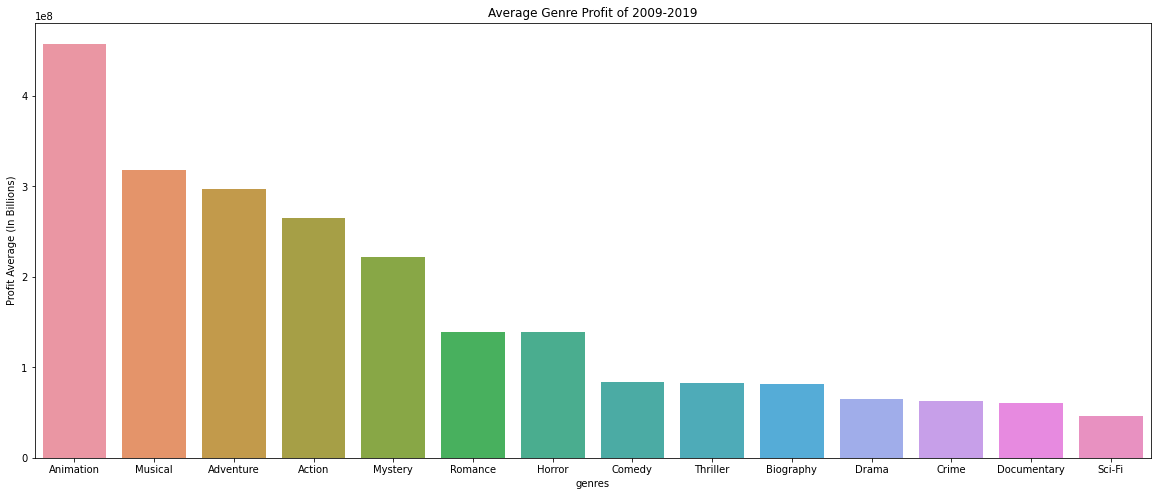

In [21]:
sns.color_palette("crest", as_cmap=True)
fig, ax = plt.subplots(figsize=(20,8))
data = genres_and_profit_avg[:14]
genre = data.index 
total = data.values
# create bar chart 
sns.barplot(genre, total) 
# set title and labels 
ax.set_title('Average Genre Profit of 2009-2019') 
ax.set_ylabel('Profit Average (In Billions)')
plt.rc('xtick', labelsize=16);

On average the top profiting genres are Animation, Musical, Adventure, and Action. Lets compare it to the median.

In [22]:
genres_and_profit_med = imbd_movie_budget.groupby(['genres']).profit.median().sort_values(ascending=False)
genres_and_profit_med[:14]

genres
Animation    441818860.0
Musical      318083159.0
Mystery      271395649.0
Adventure    175620158.5
Romance      139226970.0
Action       120528329.5
Horror        62007958.0
Sci-Fi        45868254.0
Comedy        44984029.5
Thriller      33411152.0
Biography     32274273.0
Crime         17881006.0
Drama         16776929.0
Fantasy       15525724.0
Name: profit, dtype: float64

C:\Users\myrna\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


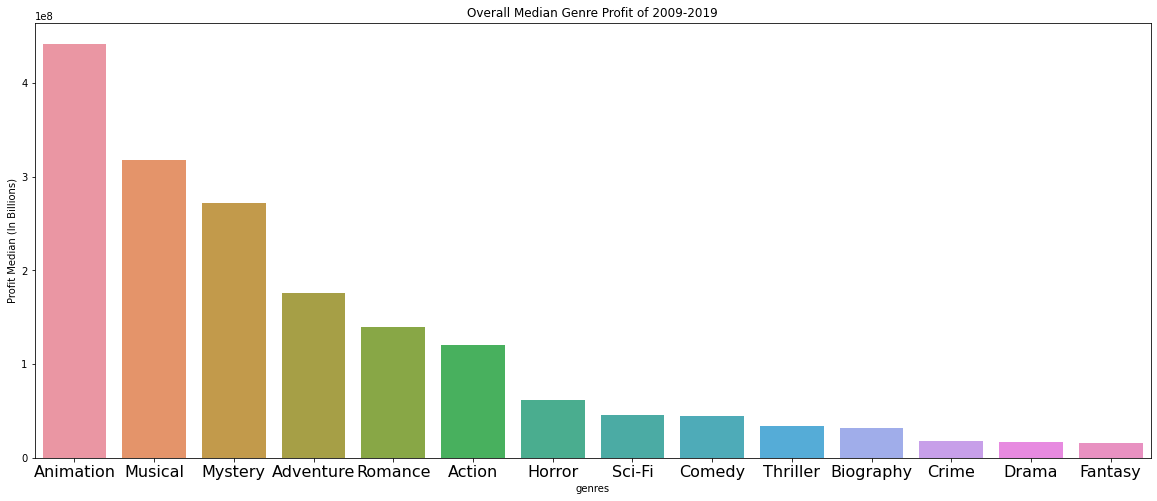

In [23]:
sns.color_palette("crest", as_cmap=True)
fig, ax = plt.subplots(figsize=(20,8))
data = genres_and_profit_med[:14]
genre = data.index 
total = data.values
# create bar chart 
sns.barplot(genre, total) 
# set title and labels 
ax.set_title('Overall Median Genre Profit of 2009-2019') 
ax.set_ylabel('Profit Median (In Billions)')
plt.rc('xtick', labelsize=16);

The Median of the genres are fairy close to each other meaning that the dataset is normally distributed and not skewed so we can rely on the mean to make our reccomendations. We still stick with recommending Animation, Musical, Adventure, Action, and Mystery as the top 5 genres to reccomend.